<a href="https://colab.research.google.com/github/rham1978/Data_Scxience/blob/main/Desafio6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold

from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from tensorflow.keras import layers, models
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from keras.regularizers import L2

1. Importa correctamente los conjuntos de datos, desplegando la cantidad de
 registros de cada categoría para cada conjunto. Despliega ocho imágenes aleatorias del conjunto de entrenamiento y codifica las etiquetas con OneHotEncoder para los conjuntos de entrenamiento y Test.

In [4]:
x_train= np.load('/content/cnn_train_X.npy',allow_pickle=True)
y_train= np.load('/content/cnn_train_y.npy',allow_pickle=True)
x_test= np.load('/content/cnn_test_X.npy',allow_pickle=True)
y_test= np.load('/content/cnn_test_y.npy',allow_pickle=True)
x_pred= np.load('/content/cnn_pred_X.npy',allow_pickle=True)

In [5]:
print(f" x_train  {x_train.shape[0]}")
print(pd.Series(y_train).value_counts())

 x_train  14034
mountain     2512
glacier      2404
street       2382
sea          2274
forest       2271
buildings    2191
Name: count, dtype: int64


In [6]:
print(f" x_test  {x_test.shape[0]}")
print(pd.Series(y_test).value_counts())

 x_test  3000
glacier      553
mountain     525
sea          510
street       501
forest       474
buildings    437
Name: count, dtype: int64


In [38]:
def mostrar_imagenes(x, y, nrow=3, ncol=3):
    fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(4 + ncol, 4 + nrow/2.5),
                          sharex=True, sharey=True)

    for i in range(nrow):
        for j in range(ncol):
            alea = np.random.randint(0, x.shape[0]+1)
            ax[i, j].set_title(y[alea])
            ax[i, j].imshow(x[alea])
            ax[i, j].set_title(y[alea])
            ax[i, j].set_axis_off()

    plt.tight_layout()
    plt.show();

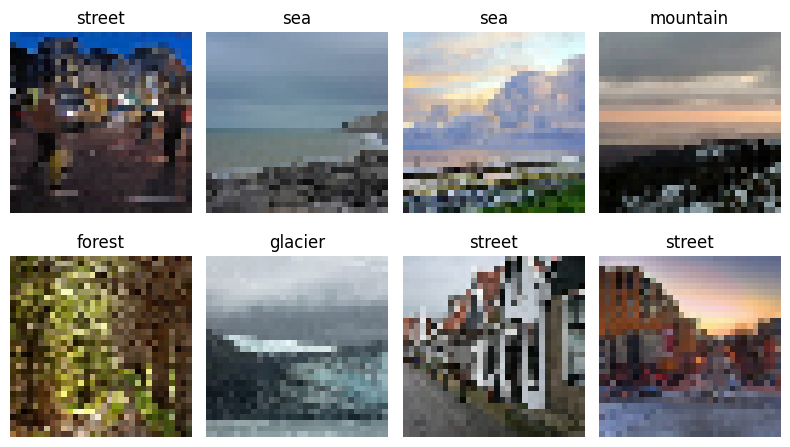

In [8]:
 mostrar_imagenes(x_train, y_train, nrow=2, ncol=4)

In [9]:
one_hot= OneHotEncoder()
y_train = one_hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = one_hot.fit_transform(y_test.reshape(-1, 1)).toarray()

2. Implementa una red neuronal multicapa Fully Connected para clasificar las
imágenes, las que deben contener un mínimo de cinco capas ocultas. Despliega las métricas (aplicadas al conjunto de test) que estimes conveniente para medir el rendimiento del modelo.

In [10]:
model = Sequential()

model.add(Input(shape=(x_train.shape[1], x_train.shape[2],x_train.shape[3] )))
model.add(Flatten())


model.add(Dense(units=512, activation='relu', use_bias= True, kernel_initializer= 'glorot_normal'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=512, activation='relu', use_bias= True, kernel_initializer= 'glorot_normal'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=256, activation='relu', use_bias= True, kernel_initializer= 'glorot_normal'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=128, activation='relu', use_bias= True, kernel_initializer= 'glorot_normal'))
model.add(Dropout(rate=0.2))
model.add(Dense(units= 64, activation='relu', use_bias= True, kernel_initializer= 'glorot_normal'))
model.add(Dropout(rate=0.2))

# Capa de salida
model.add(Dense(units=6, activation='softmax', use_bias= True, kernel_initializer= 'glorot_normal'    ))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,008,902 (7.66 MB)

 Trainable params: 2,008,902 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,008,902 (7.66 MB)

 Trainable params: 2,008,902 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#Entrenamiento del modelo

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))




Epoch 1/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.2499 - loss: 1.7493 - val_accuracy: 0.4783 - val_loss: 1.3655
Epoch 2/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4506 - loss: 1.4054 - val_accuracy: 0.4757 - val_loss: 1.2984
Epoch 3/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4805 - loss: 1.3303 - val_accuracy: 0.4833 - val_loss: 1.3281
Epoch 4/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4994 - loss: 1.2968 - val_accuracy: 0.5283 - val_loss: 1.2357
Epoch 5/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5156 - loss: 1.2643 - val_accuracy: 0.5503 - val_loss: 1.2228
Epoch 6/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5363 - loss: 1.2137 - val_accuracy: 0.5557 - val_loss: 1.2016
Epoch 7/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5368 - loss: 1.2106 - val_accuracy: 0.5380 - val_loss: 1.1983
Epoch 8/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5436 - loss: 1.1969 - val_accuracy: 

In [12]:
# Evaluación del modelo en el conjunto de test
y_pred = model.predict(x_test)

# Convertir las predicciones y etiquetas de test a clases
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred_classes))

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

           0       0.39      0.34      0.36       437
           1       0.77      0.66      0.71       474
           2       0.63      0.48      0.55       553
           3       0.61      0.62      0.61       525
           4       0.42      0.16      0.23       510
           5       0.39      0.84      0.53       501

    accuracy                           0.52      3000
   macro avg       0.54      0.51      0.50      3000
weighted avg       0.54      0.52      0.50      3000



3. Desarrolla una red neuronal Convolucional usando tres o más capas convolucionales y dos o más capas densas, de manera que la cantidad de parámetros a estimar se encuentre en el intervalo [3MM, 8MM], con 25 épocas. Muestra la curva de la pérdida para cada época y la curva de la métrica accuracy (conjunto test).

In [20]:
model2 = Sequential()
model2.add(Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3])))

model2.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=(1,1)))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same' , strides=(1,1)  ))
model2.add(MaxPooling2D((2, 2), strides=(1,1)))

model2.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=(1,1)))
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=(1,1)))
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=(1,1)))
model2.add(MaxPooling2D((2, 2), strides=(1,1)))

model2.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=(1,1)))
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=(1,1)))
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=(1,1)))

model2.add(Dropout(.2))
model2.add(Conv2D(512, (3, 3), activation='relu', padding='same', strides=(1,1)))
model2.add(MaxPooling2D((2, 2), strides=(1,1)))


model2.add(Flatten())

model2.add(Dense(1024, activation='relu', use_bias=True, kernel_constraint=MaxNorm(3)))
model2.add(Dropout(.2))
model2.add(Dense(units=6, activation='softmax', use_bias=True, kernel_constraint=MaxNorm(3)))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 30, 30, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 29, 29, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 430592)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1024)                │     440,927,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │           6,150 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 441,921,382 (1.65 GB)

 Trainable params: 441,921,382 (1.65 GB)

 Non-trainable params: 0 (0.00 B)

In [16]:
#Entrenamiento del modelo

history1 = model2.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 47s 212ms/step - accuracy: 0.8459 - loss: 0.4147 - val_accuracy: 0.7527 - val_loss: 0.7704
Epoch 2/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 81s 206ms/step - accuracy: 0.8564 - loss: 0.3944 - val_accuracy: 0.7340 - val_loss: 0.7528
Epoch 3/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 82s 206ms/step - accuracy: 0.8625 - loss: 0.3804 - val_accuracy: 0.7850 - val_loss: 0.6174
Epoch 4/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 82s 206ms/step - accuracy: 0.8796 - loss: 0.3400 - val_accuracy: 0.7843 - val_loss: 0.6292
Epoch 5/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 82s 206ms/step - accuracy: 0.8933 - loss: 0.3106 - val_accuracy: 0.7583 - val_loss: 0.6864
Epoch 6/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 83s 211ms/step - accuracy: 0.8995 - loss: 0.2824 - val_accuracy: 0.7710 - val_loss: 0.7448
Epoch 7/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 82s 210ms/step - accuracy: 0.9100 - loss: 0.2609 - val_accuracy: 0.7807 - val_loss: 0.6241
Epoch 8/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 81s 206ms/step - accuracy: 0.9075 - loss: 0

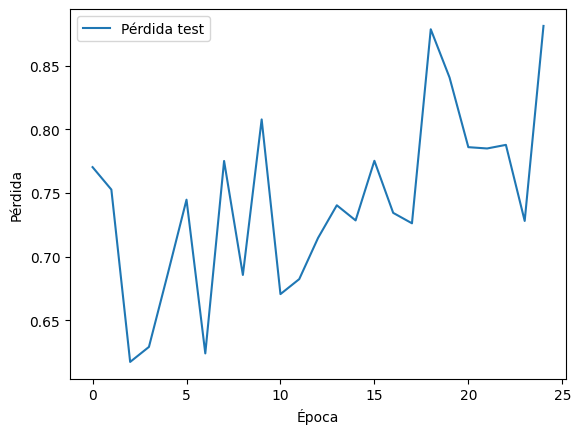

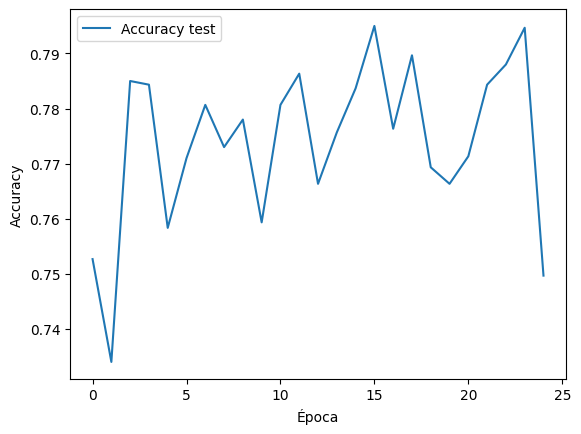

In [29]:
#Plot de la pérdida
plt.plot(history1.history['val_loss'], label='Pérdida test')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

#Plot del accuracy
plt.plot(history1.history['val_accuracy'], label='Accuracy test')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


4. Implementa una red neuronal Convolucional que mejore la capacidad de
generalización alcanzada en el modelo anterior. Para esto usa 16 o más capas (entre convolucionales y densas) y mide su rendimiento.

In [26]:
ll2 = 0.0005

ann_cnn3 = Sequential()
ann_cnn3.add(Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3])))


ann_cnn3.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='glorot_normal', kernel_constraint=MaxNorm(3), kernel_regularizer=L2(ll2)))
ann_cnn3.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='glorot_normal', kernel_constraint=MaxNorm(3), kernel_regularizer=L2(ll2)))
ann_cnn3.add(MaxPooling2D((2, 2), strides=1))
ann_cnn3.add(Dropout(.3))


ann_cnn3.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='glorot_normal', kernel_constraint=MaxNorm(3), kernel_regularizer=L2(ll2)))
ann_cnn3.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='glorot_normal', kernel_constraint=MaxNorm(3), kernel_regularizer=L2(ll2)))
ann_cnn3.add(MaxPooling2D((2, 2), strides=1))
ann_cnn3.add(Dropout(.3))


ann_cnn3.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='glorot_normal', kernel_constraint=MaxNorm(3), kernel_regularizer=L2(ll2)))
ann_cnn3.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='glorot_normal', kernel_constraint=MaxNorm(3), kernel_regularizer=L2(ll2)))
ann_cnn3.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='glorot_normal', kernel_constraint=MaxNorm(3), kernel_regularizer=L2(ll2)))
ann_cnn3.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='glorot_normal', kernel_constraint=MaxNorm(3), kernel_regularizer=L2(ll2)))
ann_cnn3.add(MaxPooling2D((2, 2), strides=1))
ann_cnn3.add(Dropout(.3))


ann_cnn3.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='glorot_normal', kernel_constraint=MaxNorm(3), kernel_regularizer=L2(ll2)))
ann_cnn3.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='glorot_normal', kernel_constraint=MaxNorm(3), kernel_regularizer=L2(ll2)))
ann_cnn3.add(MaxPooling2D((2, 2), strides=1))
ann_cnn3.add(Dropout(.3))




ann_cnn3.add(Flatten())
ann_cnn3.add(Dense(512, activation='relu', kernel_initializer='glorot_normal', kernel_constraint=MaxNorm(3)))
ann_cnn3.add(Dropout(.2))
ann_cnn3.add(Dense(512, activation='relu', kernel_initializer='glorot_normal', kernel_constraint=MaxNorm(3)))
ann_cnn3.add(Dropout(.2))

ann_cnn3.add(Dense(6, activation='softmax'))
ann_cnn3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

ann_cnn3.summary()



Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 31, 31, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 31, 31, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 30, 30, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 30, 30, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 30, 30, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 30, 30, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 29, 29, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 29, 29, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 29, 29, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 29, 29, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 28, 28, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 28, 28, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 401408)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │     205,521,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 211,652,678 (807.39 MB)

 Trainable params: 211,652,678 (807.39 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
#Entrenamiento del modelo

history2 = ann_cnn3.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 141s 486ms/step - accuracy: 0.1759 - loss: 5.1438 - val_accuracy: 0.1750 - val_loss: 2.3020
Epoch 2/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 78s 331ms/step - accuracy: 0.1805 - loss: 2.2769 - val_accuracy: 0.1750 - val_loss: 2.2136
Epoch 3/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 83s 338ms/step - accuracy: 0.1807 - loss: 2.1982 - val_accuracy: 0.1750 - val_loss: 2.1559
Epoch 4/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 80s 328ms/step - accuracy: 0.1793 - loss: 2.1449 - val_accuracy: 0.1750 - val_loss: 2.1124
Epoch 5/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 83s 334ms/step - accuracy: 0.1790 - loss: 2.1034 - val_accuracy: 0.1750 - val_loss: 2.0763
Epoch 6/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 80s 325ms/step - accuracy: 0.1769 - loss: 2.0687 - val_accuracy: 0.1750 - val_loss: 2.0453
Epoch 7/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 83s 332ms/step - accuracy: 0.1800 - loss: 2.0392 - val_accuracy: 0.1750 - val_loss: 2.0183
Epoch 8/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 80s 325ms/step - accuracy: 0.1819 - loss: 

In [31]:
# Evaluación del modelo en el conjunto de test
y_pred = ann_cnn3.predict(x_test)

# Convertir las predicciones y etiquetas de test a clases
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred_classes, zero_division=0))

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       437
           1       0.00      0.00      0.00       474
           2       0.00      0.00      0.00       553
           3       0.17      1.00      0.30       525
           4       0.00      0.00      0.00       510
           5       0.00      0.00      0.00       501

    accuracy                           0.17      3000
   macro avg       0.03      0.17      0.05      3000
weighted avg       0.03      0.17      0.05      3000



Podemos observar que este modelo presenta pesimos indicadores, siendo los dos modelos anteriores mejores.




In [ ]:
#Y lo vamos a confirmar al tratar de predecir.

In [40]:
y_pred_hat = ann_cnn3.predict(x_pred)
y_pred_hat = np.apply_along_axis(lambda x: np.argmax(x), axis = 1, arr=y_pred_hat)



229/229 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step


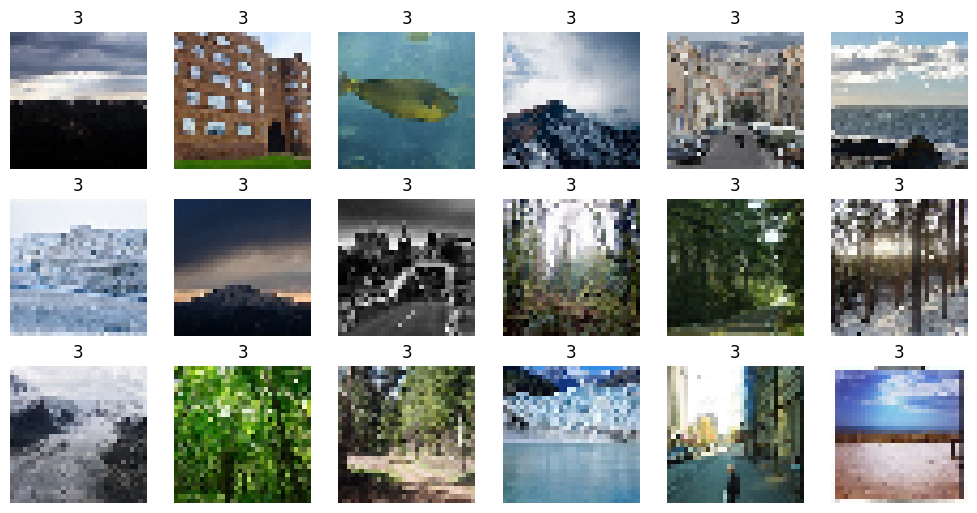

In [41]:
mostrar_imagenes(x_pred, y_pred_hat, nrow=3, ncol=6)